# Cifar-10 Dataset Analysis

## Loading the data

In [3]:
from time import time
import os
import gzip
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.datasets import cifar10

%matplotlib inline  

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.2, 
                                                  random_state=1974)

## Getting coarse classes

In [57]:
dict_coarse1 = {0: 0,
              1: 0,
              2: 1,
              3: 1,
              4: 1,
              5: 1,
              6: 1,
              7: 1,
              8: 0,
              9: 0}

dict_coarse2 = {0: 0,
              1: 1,
              2: 3,
              3: 4,
              4: 6,
              5: 4,
              6: 5,
              7: 6,
              8: 2,
              9: 1}

y_train_coarse1 = np.vectorize(dict_coarse1.get)(y_train)
y_val_coarse1 = np.vectorize(dict_coarse1.get)(y_val)
y_test_coarse1 = np.vectorize(dict_coarse1.get)(y_test)

y_train_coarse2 = np.vectorize(dict_coarse2.get)(y_train)
y_val_coarse2 = np.vectorize(dict_coarse2.get)(y_val)
y_test_coarse2 = np.vectorize(dict_coarse2.get)(y_test)

# y_train_c_cat = np_utils.to_categorical(y_train_coarse)
# y_val_c_cat = np_utils.to_categorical(y_val_coarse)
# y_test_c_cat= np_utils.to_categorical(y_test_coarse)

In [97]:
dict_labels_fine = {0: 'airplane',
             1: 'automobile',
             2: 'bird',
             3: 'cat',
             4: 'deer',
             5: 'dog',
             6: 'frog',
             7: 'horse',
             8: 'ship',
             9: 'truck'}

dict_labels_coarse1 = {0: 'transport',
                       1: 'animals'}

dict_labels_coarse2 = {0: 'air-transport',
                       1: 'ground-transport',
                       2: 'water-transport',
                       3: 'aves',
                       4: 'pets',
                       5: 'amphibian',
                       6: 'large-mammals'}


y_train_label_coarse1 = np.vectorize(dict_labels_coarse1.get)(y_train_coarse1)
y_val_label_coarse1 = np.vectorize(dict_labels_coarse1.get)(y_val_coarse1)
y_test_label_coarse1 = np.vectorize(dict_labels_coarse1.get)(y_test_coarse1)

y_train_label_coarse2 = np.vectorize(dict_labels_coarse2.get)(y_train_coarse2)
y_val_label_coarse2 = np.vectorize(dict_labels_coarse2.get)(y_val_coarse2)
y_test_label_coarse2 = np.vectorize(dict_labels_coarse2.get)(y_test_coarse2)



In [98]:
y_test_label_coarse2

array([['pets'],
       ['water-transport'],
       ['water-transport'],
       ..., 
       ['pets'],
       ['ground-transport'],
       ['large-mammals']],
      dtype='<U16')

In [89]:
np.vectorize(dict_labels_coarse1.get)(y_train_coarse1)

array([['animals'],
       ['animals'],
       ['animals'],
       ..., 
       ['animals'],
       ['animals'],
       ['animals']],
      dtype='<U9')

In [ ]:
def plot_classification_numbers(X, y_real, y_got, plotTitle, label='pred'):
    
    for i in range(1, 13):
        two_d = (np.reshape(X[i], (28, 28)) * 255).astype(np.uint8)
        plt.subplot(3,4,i)
        plt.title('{} = {}'.format(label, y_got[i]))
        plt.xlabel('real = {}'.format(y_real[i]))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(two_d, cmap='gray')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.suptitle(plotTitle)
    plt.show()

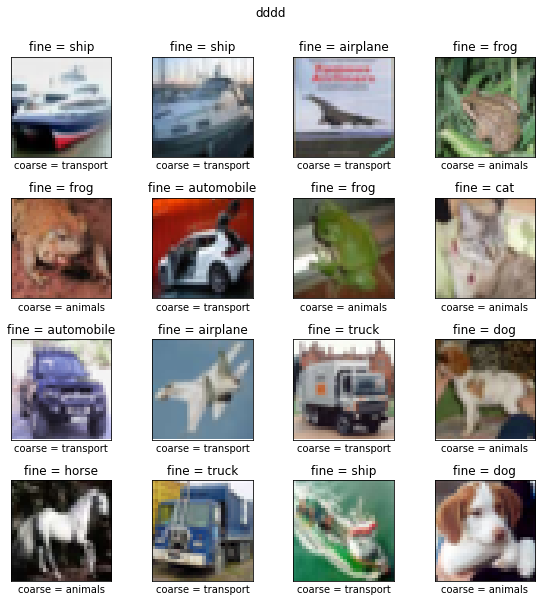

In [91]:
plt.figure(figsize=(8,8))
for i in range(1, 17):
    plt.subplot(4,4,i)
    plt.title('fine = {}'.format(dict_labels_fine[y_test[i,0]]))
    plt.xlabel('coarse = {}'.format(dict_labels_coarse1[y_test_coarse1[i,0]]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i])

plt.subplots_adjust(top=.85)
plt.register_cmap
plt.suptitle('dddd', y =1.04)
plt.tight_layout()
# plt.savefig('teste.pdf')
plt.show()        